In [104]:
import matplotlib.pyplot as pl
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris=pd.read_csv(fileURL, names=['Sepal_Length', 'Sepal_Width','Petal_Length','Petal_Width','Species'],header=None)
iris = iris.dropna()

In [94]:
iris[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
type(iris)

pandas.core.frame.DataFrame

In [68]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


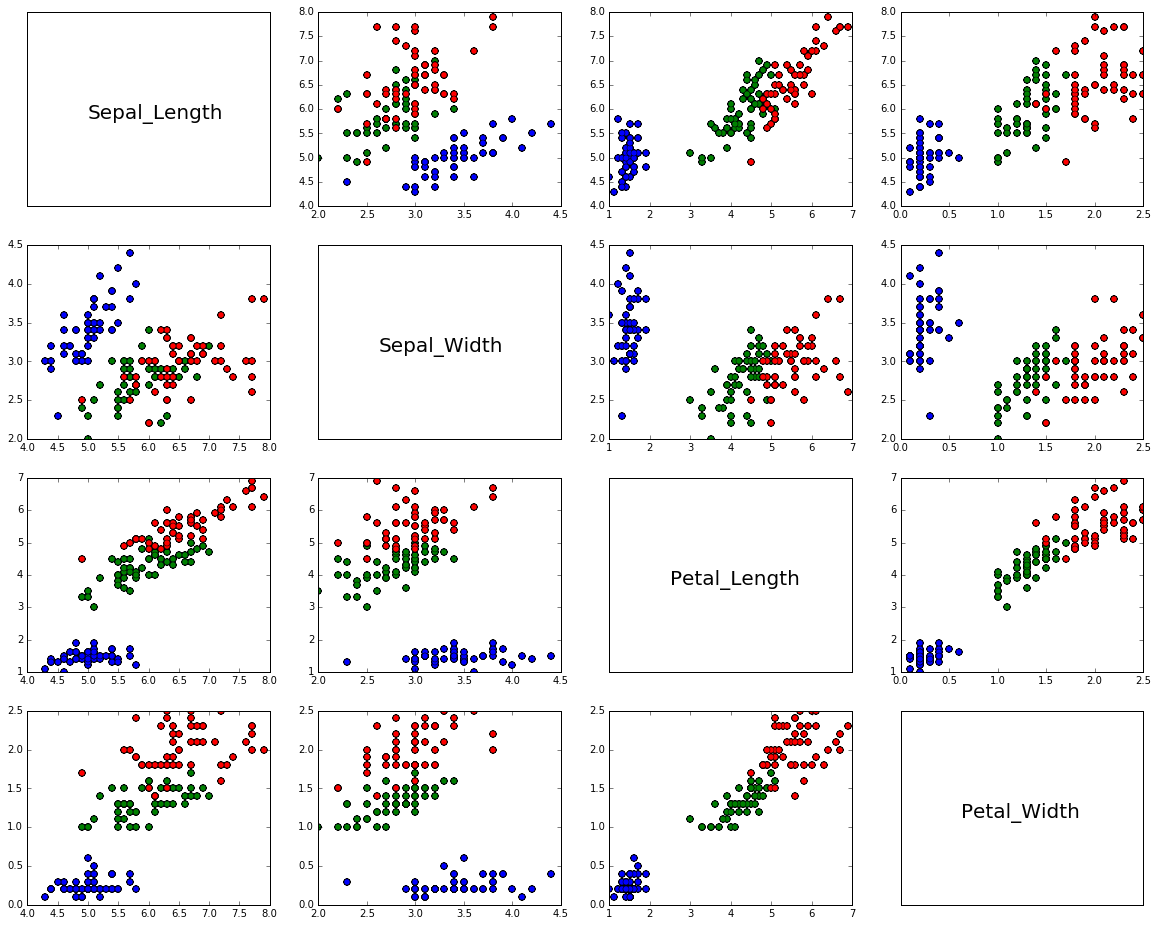

In [69]:
pairs(iris)

In [70]:
 # Divide columns into features and class.
features = list(iris.columns)
classes = features[-1] # create class column
del features[-1] # delete class column from feature vector

In [71]:
features

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [72]:
classes

'Species'

In [73]:
    train, test= train_test_split(iris)
    train_feature1 = train.ix[:, 0:1]
    train_feature1[:5]

,Sepal_Length
122,7.7
96,5.7
42,4.4
21,5.1
88,5.6


A Plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics:

In [91]:
from sklearn.cross_validation import train_test_split


def linear_regression_plot(iris, feature1, feature2):
    # Split the data into training/testing sets
    train, test= train_test_split(iris)
    train_feature1 = train.ix[:, feature1]
    train_feature2 = train.ix[:, feature2]
    test_feature1 = test.ix[:, feature1]
    test_feature2 = test.ix[:, feature2]
    
    
    #call linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(train_feature1,train_feature2)
    
    pl.scatter(test_feature1, test_feature2,  color='black')
    pl.plot(test_feature1, regr.predict(test_feature1), color='blue',linewidth=3)

    # The coefficients
    print('Coefficients:', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(test_feature1) - test_feature2) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(test_feature1, test_feature2))

    # Plot outputs
    pl.xticks(())
    pl.yticks(())


    pl.show()

('Coefficients:', array([[-0.0527874]]))
Mean squared error: 0.23
Variance score: 0.01


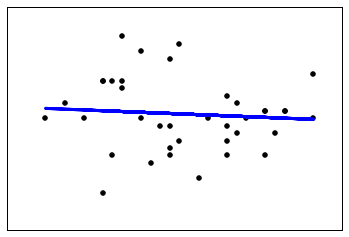

('Coefficients:', array([[ 1.88061639]]))
Mean squared error: 0.79
Variance score: 0.78


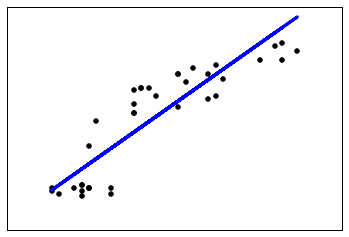

('Coefficients:', array([[ 0.77378197]]))
Mean squared error: 0.19
Variance score: 0.61


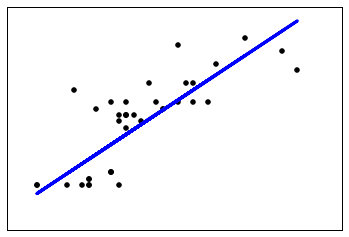

('Coefficients:', array([[-0.26676917]]))
Mean squared error: 0.85
Variance score: -0.04


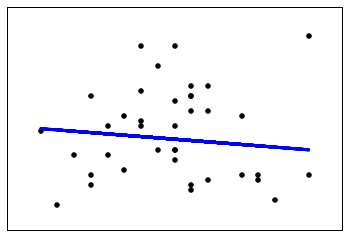

('Coefficients:', array([[-1.73871281]]))
Mean squared error: 2.02
Variance score: 0.22


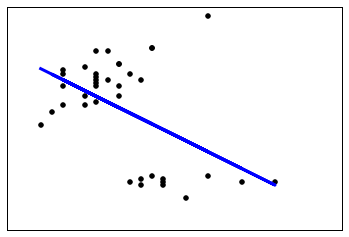

('Coefficients:', array([[-0.56520864]]))
Mean squared error: 0.40
Variance score: 0.18


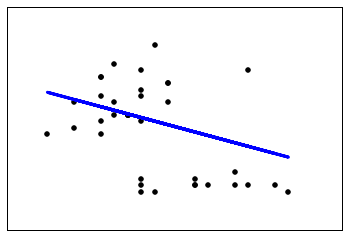

('Coefficients:', array([[ 0.39622046]]))
Mean squared error: 0.21
Variance score: 0.73


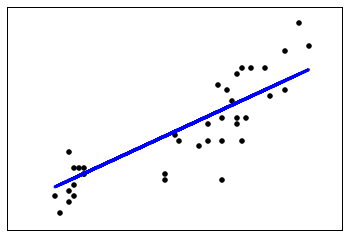

('Coefficients:', array([[-0.123065]]))
Mean squared error: 0.16
Variance score: -0.08


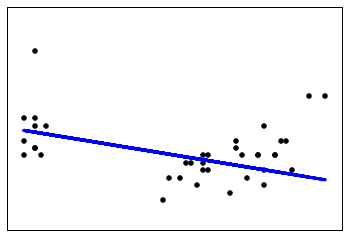

('Coefficients:', array([[ 0.41728764]]))
Mean squared error: 0.04
Variance score: 0.94


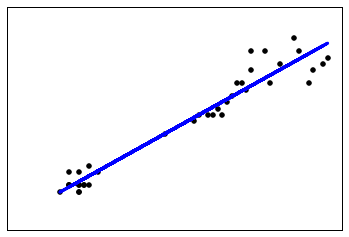

('Coefficients:', array([[ 0.8868797]]))
Mean squared error: 0.24
Variance score: 0.66


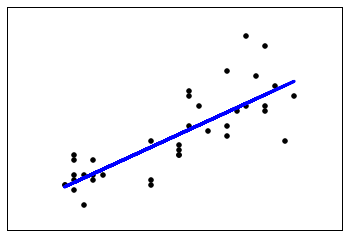

('Coefficients:', array([[-0.19038117]]))
Mean squared error: 0.14
Variance score: 0.13


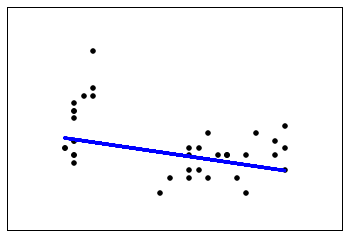

('Coefficients:', array([[ 2.21496171]]))
Mean squared error: 0.32
Variance score: 0.88


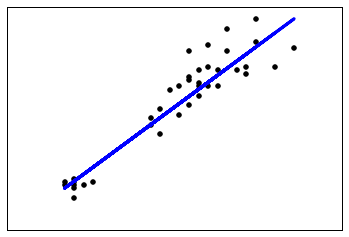

In [93]:
for x in range(4):
    for y in range(4):
     if(x != y):
        linear_regression_plot(iris,(x,), (y,))


A plot of the best overall linear regression model you were able to generate using any combination of features(including the use of multiple features used in combination to predict a single feature), with corresponding model statistics. 

In [95]:
from mpl_toolkits.mplot3d import Axes3D

In [159]:
trainSet, testSet= train_test_split(iris)
train_X = trainSet.ix[:, 0:4]
train_Y = trainSet.ix[:,4]
test_X = testSet.ix[:,0:4]
test_Y = testSet.ix[:,4]

In [121]:
train_X[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
52,6.9,3.1,4.9,1.5
79,5.7,2.6,3.5,1.0
125,7.2,3.2,6.0,1.8
103,6.3,2.9,5.6,1.8
7,5.0,3.4,1.5,0.2


In [180]:
test_X[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
120,6.9,3.2,5.7,2.3
21,5.1,3.7,1.5,0.4
20,5.4,3.4,1.7,0.2
17,5.1,3.5,1.4,0.3
77,6.7,3.0,5.0,1.7


In [161]:
ols = linear_model.LinearRegression()
ols.fit(train_X.ix[:,(0,1)], train_X.ix[:,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
ols

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [215]:
ols.predict(test.ix[:,(0,1)])

array([ 5.53005963,  4.08080873,  5.92541901,  4.73934086,  1.79237497,
        4.21059434,  2.01188568,  1.96942416,  3.90255903,  5.75077085,
        4.21179485,  5.53246066,  4.0784077 ,  4.95885157,  1.26602947,
        3.37621353,  1.21876589,  4.95885157,  4.25545689,  4.51983015,
        1.52920222,  4.25545689,  5.97148208,  6.49782758,  4.91398902,
        1.96822364,  5.31054892,  4.51862964,  1.57166375,  4.12567128,
        1.8348365 ,  4.38764352,  5.00371413,  4.12447077,  2.3211215 ,
        2.0130862 ,  4.12447077,  5.26688688,  2.36718457,  1.66018834,
        3.86129802,  2.05674824,  1.9245616 ,  7.3334089 ,  5.26808739,
        2.0130862 ,  1.61412527,  2.5394317 ,  2.14527283,  3.81643547,
        3.72911139,  1.35335355,  1.44067763,  3.90375955,  5.13710127,
        1.83723753,  1.96942416,  5.1795628 ,  3.15790333,  1.79237497,
        7.59778216,  1.8348365 ,  1.52800171,  1.43947712,  5.48879862,
        1.48554018,  1.08898029,  3.99348465,  3.81643547,  3.64

In [211]:
def plot_figs(fig_num, elev, azim, train_X,test_X, clf):
    fig = plt.figure(fig_num, figsize=(6, 5))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    X = train_X.ix[:, 0]
    Y = train_X.ix[:, 1]
    Z = clf.predict(test.ix[:,(0,1)])
        
    ax.scatter(train_X.ix[:, 0], train_X.ix[:, 1], train_X.ix[:, 2], c='k', marker='+')
    ax.plot_surface(X,Y,Z)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

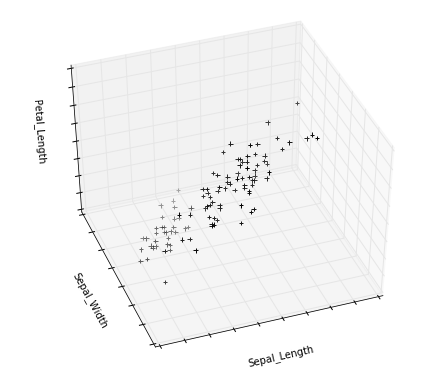

In [212]:
#Generate the three different figures from different views
elev = 43.5
azim = -110
plot_figs(1, elev, azim, train_X,test_X, ols)

plt.show()